In [1]:
import matplotlib
import pandas as pd
import collections

In [3]:
# tp_df_full = pd.read_csv('/mnt/graphdata/features/has_host_edges.csv')
tp_df = pd.read_csv('/mnt/graphdata/datasets/palmprint-host-dataset_0.1/has_host_edges.csv')
tp_df = tp_df.loc[:, ~tp_df.columns.str.contains('^Unnamed')]

print('actual', len(tp_df))

predictions = pd.read_csv('/mnt/graphdata/results/link_prediction/0.1/1685410469/approx_predictions.csv')
predictions = predictions.rename(columns={"node1": "sourceNodeId", "node2": "targetNodeId"})
predictions = predictions.loc[:, ~predictions.columns.str.contains('^Unnamed')]


print('predictions', len(predictions))

actual 464116
predictions 22883


In [4]:
# Check if source-target predictions are in the actual dataset

merged = predictions.merge(
    tp_df,
    on=['sourceNodeId', 'targetNodeId'],
    how='left',
    suffixes=('_pred', '_actual')
).dropna()

print(len(merged))

merged = predictions.merge(
    tp_df,
    on=['sourceNodeId'],
    how='left',
    suffixes=('_pred', '_actual')
).dropna()

print(len(merged))

0
190299


In [5]:
# Create dictionary from source palmprints to lists of predicted and actual targets taxons

has_host_map = {}

for index, row in tp_df.iterrows():
    if not row['sourceNodeId'] in has_host_map:
        has_host_map[row['sourceNodeId']] = {
            'actual': [],
            'pred': [],
        }
    has_host_map[row['sourceNodeId']]['actual'].append(row['targetNodeId'])

for index, row in predictions.iterrows():
    if not row['sourceNodeId'] in has_host_map:
        has_host_map[row['sourceNodeId']] = {
            'actual': [],
            'pred': [],
        }
    has_host_map[row['sourceNodeId']]['pred'].append(row['targetNodeId'])

for key in list(has_host_map.keys()):
    if len(has_host_map[key]['pred']) == 0:
        del has_host_map[key]

print(len(has_host_map))

22883


Text(0, 0.5, 'number of palmprints')

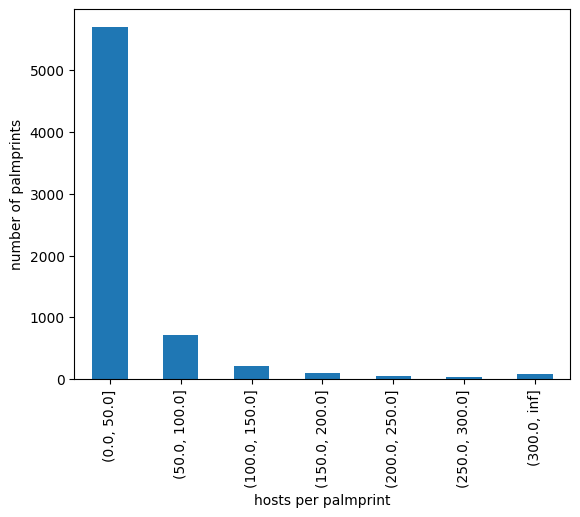

In [13]:
# Check for skew in the number of actual hosts for palmprints

counts_map  = {}

for source in has_host_map:
    if not len(has_host_map[source]['actual']) in counts_map:
        counts_map[len(has_host_map[source]['actual'])] = []
    counts_map[len(has_host_map[source]['actual'])].append(source)


counts_keys = sorted(counts_map.keys(), reverse=True)

# for i in range(10):
#     print(counts_keys[i], counts_map[counts_keys[i]])


counts_orig = pd.Series([
    len(has_host_map[key]['actual']) for key in has_host_map
])
counts_grouped  = pd.cut(counts_orig, bins=[0, 50, 100, 150, 200, 250, 300, float("inf")])
plot = counts_grouped.value_counts(sort=False).plot(kind='bar')
plot.set_xlabel("hosts per palmprint")
plot.set_ylabel("number of palmprints")


Text(0, 0.5, 'palmprints ')

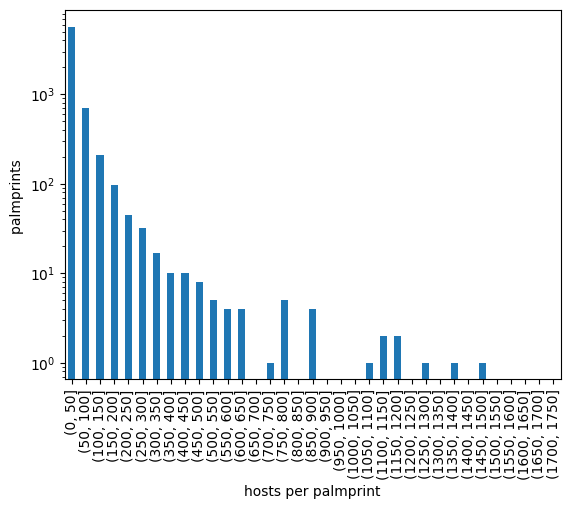

In [51]:
bins = list(range(0, 1800, 50))
counts_grouped_2  = pd.cut(counts_orig, bins=bins)
plot = counts_grouped_2.value_counts(sort=False).plot(kind='bar', logy=True)
plot.set_xlabel("hosts per palmprint")
plot.set_ylabel("palmprints ")

0         17
1         87
2       2531
3         60
4        294
        ... 
4583       1
4584       1
4585       1
4586       1
4587       1
Length: 4588, dtype: int64


Text(0, 0.5, 'hosts')

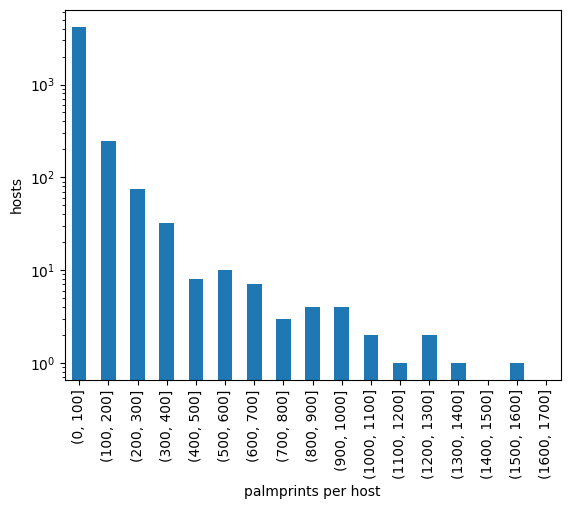

In [59]:
# Check for skew in the number of actual hosts for palmprints

taxon_has_palmprint  = {}

for source in has_host_map:
    for target in has_host_map[source]['actual']:
        if not target in taxon_has_palmprint:
            taxon_has_palmprint[target] = []
        taxon_has_palmprint[target].append(source)

# counts_map  = {}

# for source in taxon_has_palmprint:
#     if not len(taxon_has_palmprint[source]) in counts_map:
#         counts_map[len(taxon_has_palmprint[source])] = []
#     counts_map[len(taxon_has_palmprint[source])].append(source)

# print(taxon_has_palmprint)

# counts_keys = sorted(counts_map.keys(), reverse=True)

counts_orig = pd.Series([
    len(taxon_has_palmprint[key]) for key in taxon_has_palmprint
])
print(counts_orig)

bins = list(range(0, 1800, 100))
counts_grouped  = pd.cut(counts_orig, bins=bins)
plot = counts_grouped.value_counts(sort=False).plot(kind='bar', logy=True)
plot.set_xlabel("palmprints per host")
plot.set_ylabel("hosts")

In [52]:
# Check for skew in number of predictions per palmprint

counts_map  = {}

for source in has_host_map:
    if not len(has_host_map[source]['pred']) in counts_map:
        counts_map[len(has_host_map[source]['pred'])] = []
    counts_map[len(has_host_map[source]['pred'])].append(source)


counts_keys = sorted(counts_map.keys(), reverse=True)

print(counts_map.keys())

dict_keys([1])


<AxesSubplot:>

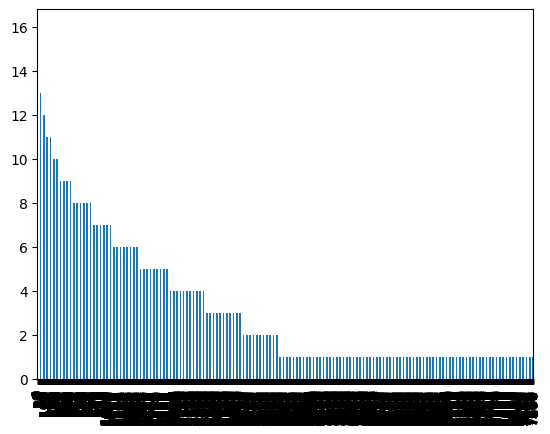

In [48]:
# Check for skew in number of predicted target taxons

counts_map  = {}

for source in has_host_map:
    for target in has_host_map[source]['pred']:
        if not target in counts_map:
            counts_map[target] = 0
        counts_map[target] += 1

counts_keys = pd.Series(sorted(counts_map.values(), reverse=True))
counts_keys.plot(kind='bar')